In [9]:
from grape_chem.datasets import QM9
train, test, val, mean, std = QM9().split_and_scale(seed=42, return_scaling_params=True)
(0.00814*std)+mean

1191.9294402276612

In [8]:
import pandas as pd
import numpy as np
df = pd.read_excel('data_splits.xlsx', sheet_name='FreeSolv')
y = df['Target'].to_numpy()
x = df['AFP Prediction'].to_numpy()

print(np.sqrt(np.mean((y-x)**2)))

0.804298607560725


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as snb

snb.set_style('darkgrid')
snb.set_theme(font_scale=1.25)

from grape.datasets import *
mp = BradleyDoublePlus()
mp_y = mp.rescale_data(mp.target)
logp = LogP()
logp_y = logp.rescale_data(logp.target)
qm = QM9()
qm_y = qm.rescale_data(qm.target)
fs = FreeSolv()
fs_y = fs.rescale_data(fs.target)

ModuleNotFoundError: No module named 'grape'

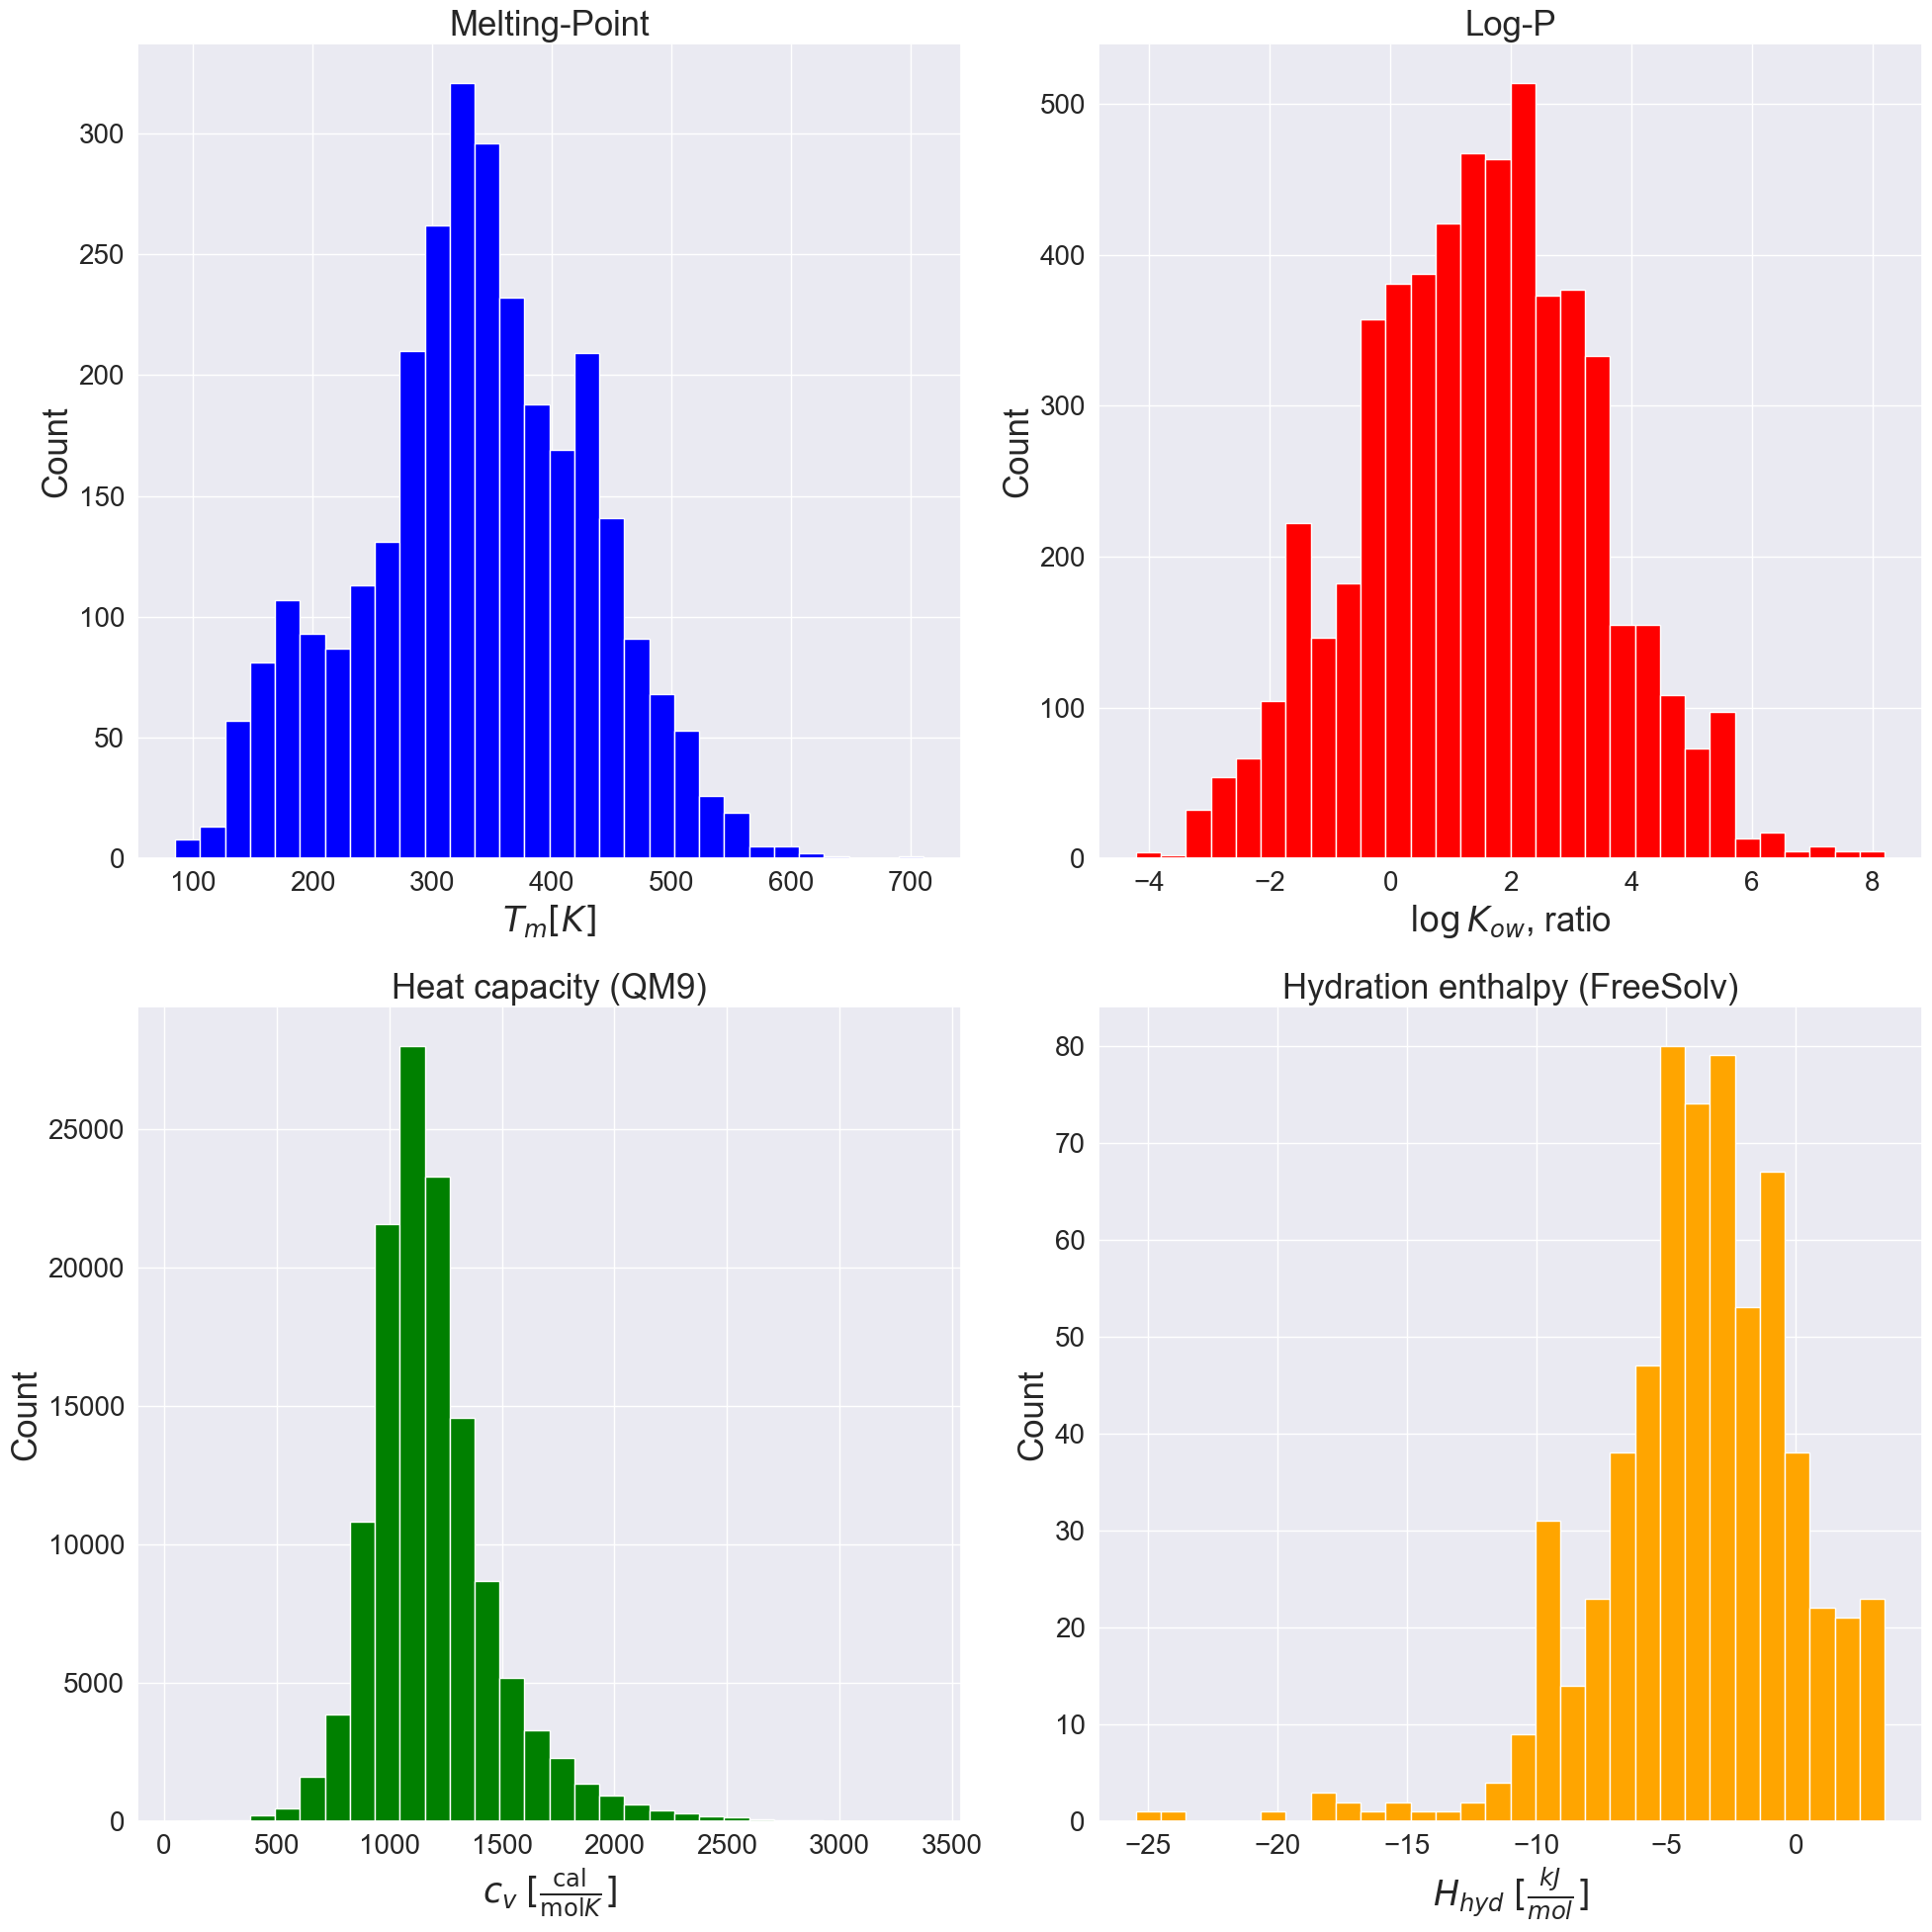

In [ ]:
import matplotlib
fontsize = 25
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(2,2, figsize = (20,20))

ax[0,0].hist(mp_y+273.15, bins = 30, color = 'blue')
ax[0,0].set_title('Melting-Point', fontsize = fontsize)
ax[0,0].set_xlabel('$T_m [K]$', fontsize = fontsize)
ax[0,0].set_ylabel('Count', fontsize = fontsize)

ax[0,1].hist(logp_y, bins = 30, color = 'red')
ax[0,1].set_title('Log-P', fontsize = fontsize)
ax[0,1].set_xlabel('$\log K_{ow}$, ratio', fontsize = fontsize)
ax[0,1].set_ylabel('Count', fontsize = fontsize)

ax[1,0].hist(qm_y, bins = 30, color = 'green')
ax[1,0].set_title('Heat capacity (QM9)', fontsize = fontsize)
ax[1,0].set_xlabel('$c_v \; [\\frac{\\text{cal}}{\\text{mol} K}]$', fontsize = fontsize)
ax[1,0].set_ylabel('Count', fontsize = fontsize)


ax[1,1].hist(fs_y, bins = 30, color='orange')
ax[1,1].set_title('Hydration enthalpy (FreeSolv)', fontsize = fontsize)
ax[1,1].set_xlabel('$H_{hyd} \; [\\frac{kJ}{mol}]$', fontsize = fontsize)
ax[1,1].set_ylabel('Count', fontsize = fontsize)

for axs in ax.flat:
    axs.tick_params(axis='both', which='major', labelsize=20)
    #axs.tick_params(axis='both', which='minor', labelsize=8)

fig.tight_layout()
fig.savefig('./results/datasets.svg')

In [ ]:
def return_hidden_layers(num):
    return [2**i*32 for i in range(num, 0,-1)]

return_hidden_layers(3)
        

[256, 128, 64]

In [ ]:
import pandas as pd
import numpy as np
smiles = np.random.uniform(size=10)
target = np.random.random(size=10)

df = pd.DataFrame({'SMILES':smiles, 'Split':'train','Target':target});
df2 = pd.DataFrame({'SMILES':smiles, 'Split':'test','Target':target});
df = pd.concat([df,df2])
df['Preds'] = np.random.random(size=len(df))
df.loc[df['Split'] == 'train','Preds'] = 1
print(df)

with pd.ExcelWriter('multiple_sheets.xlsx', engine='openpyxl') as writer:
    # Write each DataFrame to a different sheet
    df.to_excel(writer, sheet_name='Sheet1', index=False)
    df2.to_excel(writer, sheet_name='Sheet2', index=False)

     SMILES  Split    Target     Preds
0  0.397071  train  0.176612  1.000000
1  0.543468  train  0.660319  1.000000
2  0.636160  train  0.674025  1.000000
3  0.485992  train  0.888092  1.000000
4  0.423241  train  0.443542  1.000000
5  0.348537  train  0.790220  1.000000
6  0.679370  train  0.090814  1.000000
7  0.708685  train  0.213937  1.000000
8  0.683317  train  0.927254  1.000000
9  0.033045  train  0.278104  1.000000
0  0.397071   test  0.176612  0.821463
1  0.543468   test  0.660319  0.502919
2  0.636160   test  0.674025  0.826935
3  0.485992   test  0.888092  0.590525
4  0.423241   test  0.443542  0.946529
5  0.348537   test  0.790220  0.453656
6  0.679370   test  0.090814  0.221662
7  0.708685   test  0.213937  0.302650
8  0.683317   test  0.927254  0.215221
9  0.033045   test  0.278104  0.168172


In [ ]:
df = pd.read_excel('multiple_sheets.xlsx', sheet_name='Sheet1')

In [ ]:
from grape.datasets import *
import pandas as pd

np.random.seed(42)

with pd.ExcelWriter('data_splits.xlsx', engine='openpyxl') as writer:
    
    ##### Bradley double plus #####
    mp = BradleyDoublePlus(split_type='random', split_frac=[0.8,0.1,0.1], scale=False)
    train, test, val = mp.train, mp.test, mp.val
    df_train = pd.DataFrame({'SMILES':train.smiles, 'Split':'train','Target':train.target})
    df_val = pd.DataFrame({'SMILES':val.smiles, 'Split':'val','Target':val.target})
    df_test = pd.DataFrame({'SMILES':test.smiles, 'Split':'test','Target':test.target})
    df = pd.concat([df_train,df_val,df_test])
    df.to_excel(writer, sheet_name='Melting Point', index=False)
    
    ##### Log-P #####
    mp = BradleyDoublePlus(split_type='random', split_frac=[0.8,0.1,0.1], scale=False)
    train, test, val = mp.train, mp.test, mp.val
    df_train = pd.DataFrame({'SMILES':train.smiles, 'Split':'train','Target':train.target})
    df_val = pd.DataFrame({'SMILES':val.smiles, 'Split':'val','Target':val.target})
    df_test = pd.DataFrame({'SMILES':test.smiles, 'Split':'test','Target':test.target})
    df = pd.concat([df_train,df_val,df_test])
    df.to_excel(writer, sheet_name='Melting Point', index=False)
    
    ##### Bradley double plus #####
    mp = BradleyDoublePlus(split_type='random', split_frac=[0.8,0.1,0.1], scale=False)
    train, test, val = mp.train, mp.test, mp.val
    df_train = pd.DataFrame({'SMILES':train.smiles, 'Split':'train','Target':train.target})
    df_val = pd.DataFrame({'SMILES':val.smiles, 'Split':'val','Target':val.target})
    df_test = pd.DataFrame({'SMILES':test.smiles, 'Split':'test','Target':test.target})
    df = pd.concat([df_train,df_val,df_test])
    df.to_excel(writer, sheet_name='Melting Point', index=False)
    
    ##### Bradley double plus #####
    mp = BradleyDoublePlus(split_type='random', split_frac=[0.8,0.1,0.1], scale=False)
    train, test, val = mp.train, mp.test, mp.val
    df_train = pd.DataFrame({'SMILES':train.smiles, 'Split':'train','Target':train.target})
    df_val = pd.DataFrame({'SMILES':val.smiles, 'Split':'val','Target':val.target})
    df_test = pd.DataFrame({'SMILES':test.smiles, 'Split':'test','Target':test.target})
    df = pd.concat([df_train,df_val,df_test])
    df.to_excel(writer, sheet_name='Melting Point', index=False)
    


IndexError: At least one sheet must be visible

In [ ]:
import pandas as pd
from grape.utils import split_data, DataSet

def load_dataset_from_excel(dataset):
    """
    dataset: str
        A string that defines what dataset should be used, specifically loaded from a graphs-splits sheet. Options:
        * "Melting Point"
        * "LogP"
        * "Heat capacity"
        * "FreeSolv"
    """
    
    df = pd.read_excel('data_splits.xlsx', sheet_name=dataset)

    data = DataSet(smiles=df.SMILES, target=df.Target, filter=False, scale=True)


    # convert given labels to a list of numbers and split dataset
    labels = df.Split.apply(lambda x: ['train', 'val', 'test'].index(x)).to_list()
    print(labels)
    train_set, val_set, test_set = split_data(data, custom_split=labels)

    return train_set, val_set, test_set

load_dataset_from_excel('Melting Point')

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

(<grape.utils.split_utils.SubSet at 0x31f54d710>,
 <grape.utils.split_utils.SubSet at 0x3205a4ed0>)

In [ ]:
def return_hidden_layers(num):
    """ Returns a list of hidden layers, starting from 2**num*32, reducing the hidden dim by 2 every step.

     Example
     --------

     >>>return_hidden_layers(3)

     [256, 128, 64]
     """
    return [2**i*32 for i in range(num, 0,-1)]
return_hidden_layers(0)

[]

In [ ]:
import os
import torch
import dgl
import numpy as np

def set_seed(seed):
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['CUBLAS_WORKSPACE_CONFIG'] = ':4096:8'
    # os.environ['OMP_NUM_THREADS'] = '1'
    # os.environ['MKL_NUM_THREADS'] = '1'
    # torch.set_num_threads(1)
    # np.random.seed(seed) # turn it off during optimization
    np.random.seed(seed)
    torch.manual_seed(seed)  # annote this line when ensembling
    dgl.random.seed(seed)
    dgl.seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        # torch.backends.cudnn.deterministic = True # Faster than the command below and may not fix results
        torch.use_deterministic_algorithms(True)
        torch.backends.cudnn.benchmark = False
        torch.backends.cudnn.enabled = False
        
np.random.seed(42)

from grape.datasets import FreeSolv
data = FreeSolv(split_frac=[0.8,0.1,0.1], split_type='random', scale=False)
data2 = FreeSolv(split_frac=[0.8,0.1,0.1], split_type='random', scale=False)
assert (data.train.smiles == data2.train.smiles).all
print(data.train.__dict__)


{'dataset': <grape.datasets.FreeSolv_dataset.FreeSolv object at 0x321ab06d0>, 'indices': array([ 55, 386, 389, 278, 346, 311, 560,  48, 538, 164,   6, 512, 440,
       474, 553, 466, 527, 313,  12, 300, 596, 489, 582, 159, 481, 597,
       480, 358, 380, 617, 383, 309, 397, 296, 543, 154, 438, 131, 449,
       221,  29, 340, 618, 329, 366,  88, 244, 556, 462, 198, 319, 100,
       105, 107, 203, 579, 182, 435, 518, 242, 532, 146, 632, 323, 342,
        16, 420, 273,  34,  64, 276, 395, 360, 494, 533, 120, 485, 303,
       626, 189, 584, 535, 530, 334,   0, 437, 470,  31,  19, 562, 129,
        60, 280,  63, 439, 237, 135, 218, 422, 109, 101, 491, 552, 425,
       368, 103, 158, 475, 364, 324, 405,  56, 204, 195, 130, 356, 205,
       330,  50,   4,  32, 472, 515, 498, 473, 136, 457,  14, 604, 536,
       155, 636, 580, 634, 190, 281, 610, 257, 495, 478, 415, 467, 633,
       559, 433, 419, 595, 388, 166,  82, 430, 223, 169, 588, 246, 444,
       547, 521, 598, 234, 173, 510, 507, 285, 

In [ ]:
from grape.datasets import FreeSolv
from grape.utils import SubSet
import numpy as np
data = FreeSolv()
global_feats = np.random.randn(len(data))
data.global_features = global_feats

print(data.global_features[5])
subset = SubSet(data, range(10))
print(subset.global_features[5])

-0.19520087250093063
-0.19520087250093063


In [ ]:
import torch
print(torch.concat([torch.ones(10,1), torch.ones(10,1)],dim=1).shape)

torch.Size([10, 2])


In [ ]:
from grape.utils import DataSet, val_epoch
from torch_geometric.loader import DataLoader
import torch 

data = DataSet(smiles=['COC(=O)c1cc(Cl)ccc1Cl','CC(C)COC(=O)C(C)C','c1ccc(-n2cccc2)cc1'], target=[1,2,3], 
               global_features=[1,2,3], scale=False)

from grape.models import AFP
model = AFP(node_in_dim=44, edge_in_dim=12, add_global_feats=True)
dataloader = DataLoader(data.graphs, batch_size=1, shuffle=True)
val_epoch(model, torch.nn.functional.mse_loss, dataloader, device='cpu')


torch.Size([1])
torch.Size([1, 128])
torch.Size([1])
torch.Size([1, 128])
torch.Size([1])
torch.Size([1, 128])


/Users/faerte/Desktop/grape/python/grape/utils/model_utils.py:257: UserWarning: Using a target size (torch.Size([129])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss_val = loss_func(batch.y, out)


4.616814394791921

In [ ]:
from grape.models import MEGNet
from grape.datasets import FreeSolv
from grape.utils import DataSet, train_model, EarlyStopping, split_data, test_model
from torch.optim import lr_scheduler
import numpy as np
import torch

##################### Simulated dataset #######################
free = FreeSolv()
free.generate_global_feats(seed=42)
train, val, test = free.split_and_scale()

# num_global_feats is the dimension of global features per observation
model = MEGNet(node_in_dim=44, edge_in_dim=12, global_in_dim=1)

################################################################


optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=0)
early_Stopper = EarlyStopping(patience=30, model_name='random', skip_save=True)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.9999, min_lr=0.0000000000001, patience=30)
loss_func = torch.nn.functional.l1_loss

train_model(model=model, loss_func=loss_func, optimizer=optimizer, train_data_loader=train,
            val_data_loader=val, epochs=10, early_stopper=early_Stopper)

free.predict_smiles(['CCC', 'CC'],model)


epoch=8, training loss= 0.606, validation loss= 0.555: 100%|██████████| 10/10 [00:02<00:00,  4.29it/s]


[2.627182722091675, 2.7818806171417236]

In [ ]:
from grape.datasets import FreeSolv
from torch_geometric.loader import DataLoader
data = FreeSolv()
print(data.graphs[0].x)
loader= DataLoader(data)
print(loader)
print(next(iter(loader)).x)
print((data.graphs[0].x == next(iter(loader)).x).all())

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
         0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
         0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
         0., 0., 0., 1

In [ ]:
from grape.datasets import FreeSolv
from grape.utils import split_data
import numpy as np
np.random.seed(42)
data = FreeSolv()
train, _, _ = split_data(data, split_type='random', split_frac=[0.8,0.1,0.1])
print(train.y[:10])
train, val, test = data.split_and_scale()
print(train.y[:10])

[-4.91 -0.8  -0.25  2.88 -7.29 -4.74 -2.13 -4.38 -6.62 -3.04]
[ 0.20713145 -0.3358984  -1.1736381   0.97392243 -0.6906416   1.1867683
 -1.0754014   0.33811355 -0.1776284  -3.3157408 ]


<Axes: title={'center': 't-distributed Stochastic Neighbor Embedding'}>

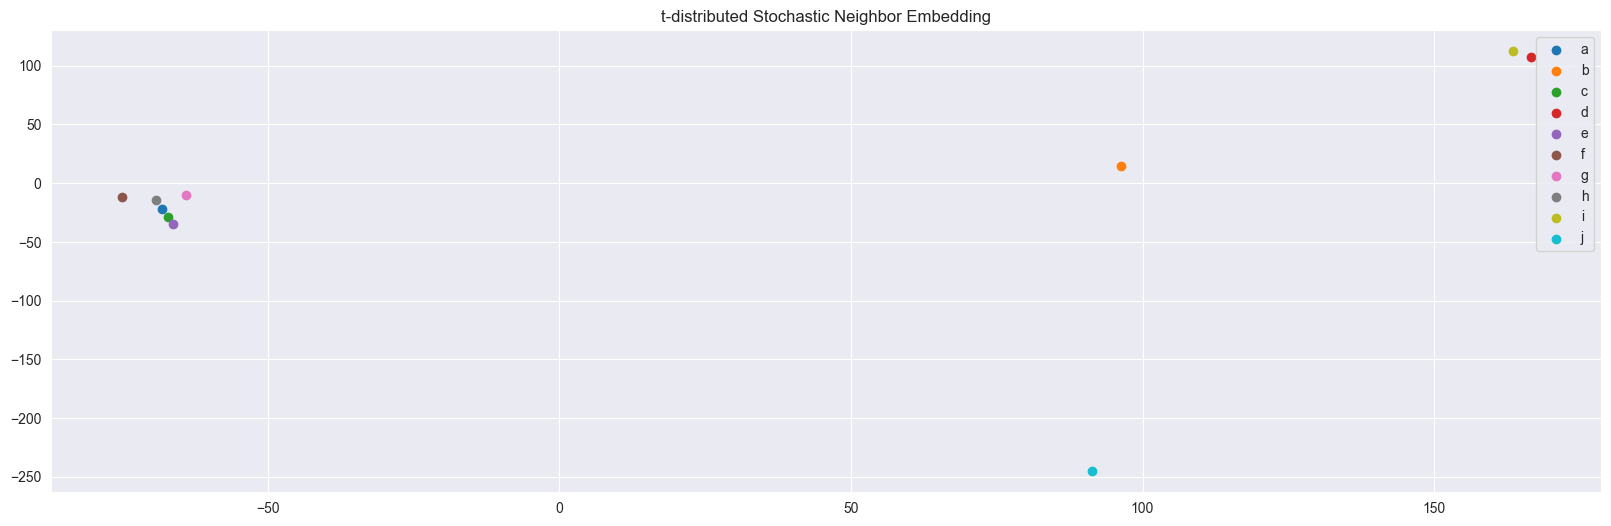

In [ ]:
import numpy as np
from grape.plots import tSNE_plot
data = np.random.randn(10,100)
labels = ['a','b','c','d','e','f','g','h','i','j']
tSNE_plot(data, labels=labels, perplexity=0.5)

In [ ]:
labels = np.array(['a','b','c','d','e','f','g','h','i','j'])
label = np.array(['a'])
label == labels

array([ True, False, False, False, False, False, False, False, False,
       False])

In [ ]:
li = [1]
print(li[0])

1


In [ ]:
print(1)

1


In [ ]:
from grape.datasets import FreeSolv
from grape.models import DMPNN
data = FreeSolv()
model = DMPNN(data.num_node_features, data.num_edge_features)

print(data.predict_smiles(['CC'], model))

[0.040441714227199554]
